## Cleaning data in Pandas.

Initial steps:

1. Import required libraries.

2. Get and display the data.

3. Add and/or remove columns.

4. Rename the column.

5. Replace values and handle missing data.

6. Get dataset info/summary

7. Sort data

8. Save clean data

### 1. Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Get and display the data.

In [2]:
# OPTION 1
# Create data: names and birth rates
make = ['VW','BMW','Mercedes Benz','Porche']
hp = [155, 180, 175, 190]

# Merge two lists together.
DataSet = list(zip(make, hp))
DataSet

[('VW', 155), ('BMW', 180), ('Mercedes Benz', 175), ('Porche', 190)]

In [3]:
# Create DataFrame and set column titles
df0 = pd.DataFrame(DataSet)
headers = ['Make','Horsepower']
df0.columns = headers
df0

,Make,Horsepower
0,VW,155
1,BMW,180
2,Mercedes Benz,175
3,Porche,190


In [4]:
# OPTION 2
# Import data from csv to a Pandas DataFrame
headers = ["symboling","normalized losses","make","Fuel type","Aspiration", "Num of doors","Body style",
         "Drive Wheels","Engine Location","Wheel Base", "Length","Width","Height","Curb weight","Engine type",
         "Num of cylinders", "Engine size","Fuel system","Bore","Stroke","Compression ratio","Horsepower",
         "Peak rpm","City mpg","Highway mpg","Price"]

df = pd.read_csv('Data/Cars.csv', names = headers)

<h3>Read/Save Other Data Formats</h3>



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |

In [5]:
# Show the first 5 rows
df.head(5)

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Show the last 5 rows
df.tail(5)

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### 3. Add, remove, select columns.

In [7]:
# Insert a column in position 1
df.insert(1, 'Test', df['make'])
df.head()

,symboling,Test,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,alfa-romero,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Delete a column
del df['Test']
df.head()

,symboling,normalized losses,make,Fuel type,Aspiration,Num of doors,Body style,Drive Wheels,Engine Location,Wheel Base,...,Engine size,Fuel system,Bore,Stroke,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Drop unused columns.
drop_columns = ["symboling","normalized losses","Aspiration",
         "Drive Wheels","Engine Location","Curb weight","Engine type","Bore","Stroke","Fuel system",'Length','Width','Height','Wheel Base']

df.drop(drop_columns, inplace = True, axis = 1)
df.head()

,make,Fuel type,Num of doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,six,152,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,four,109,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,five,136,8.0,115,5500,18,22,17450


In [10]:
# Select certain column or a group of columns from the DataFrame and generate a new df.
df3 = df[['make','Horsepower','Price']]
df3.head()

,make,Horsepower,Price
0,alfa-romero,111,13495
1,alfa-romero,111,16500
2,alfa-romero,154,16500
3,audi,102,13950
4,audi,115,17450


### 4. Rename the columns.

In [11]:
# Rename columns
newcols = {'make' : 'Make',
           'Num of doors' : 'Doors'}

df.rename(columns=newcols, inplace=True)
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,six,152,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,four,109,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,five,136,8.0,115,5500,18,22,17450


### 5. Handle missing data.

In [12]:
# Replace values in all DataFrame
# As missing data is represented by ? in this df, it is replaced by nan
df.replace("?", np.nan, inplace = True)

In [13]:
# isnull() returns True where the field is NaN.
missing_data = df.isnull()
# Makes a summary for each column and counts how many 'False' (data OK) and 'True' (data missing) are.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Make
False    205
Name: Make, dtype: int64

Fuel type
False    205
Name: Fuel type, dtype: int64

Doors
False    203
True       2
Name: Doors, dtype: int64

Body style
False    205
Name: Body style, dtype: int64

Num of cylinders
False    205
Name: Num of cylinders, dtype: int64

Engine size
False    205
Name: Engine size, dtype: int64

Compression ratio
False    205
Name: Compression ratio, dtype: int64

Horsepower
False    203
True       2
Name: Horsepower, dtype: int64

Peak rpm
False    203
True       2
Name: Peak rpm, dtype: int64

City mpg
False    205
Name: City mpg, dtype: int64

Highway mpg
False    205
Name: Highway mpg, dtype: int64

Price
False    201
True       4
Name: Price, dtype: int64



#### How to deal with missing data?
1. Drop data:
  * Drop row.
  * Drop column. This should be done only if most entries in the column are empty.
2. Replace data by:
  * Mean.
  * Frequency.
  * Other functions.

**Replace by mean:**

    "Horsepower": 2 missing data, replace them with mean

    "Peak-rpm": 2 missing data, replace them with mean

**Reason:** Both columns are numerical values and can be replaced by the mean.

Average of horsepower: 104.25615763546799


(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <a list of 10 Patch objects>)

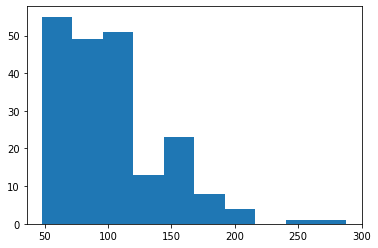

In [14]:
# Calculate column mean
avg_horsepower = df["Horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

# Replace NaN by column mean
df["Horsepower"].replace(np.nan, avg_horsepower, inplace=True)

# Plot a histogram to check if it makes sense to replace by mean
df["Horsepower"] = df["Horsepower"].astype(int, copy=True)
plt.hist(df['Horsepower'])

Average of peak rpm: 5125.369458128079


(array([17., 10., 41., 33., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <a list of 10 Patch objects>)

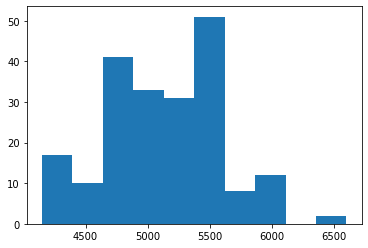

In [15]:
# Calculate column mean
avg_peak_rpm = df["Peak rpm"].astype("float").mean(axis=0)
print("Average of peak rpm:", avg_peak_rpm)

# Replace NaN by column mean
df["Peak rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

# Plot a histogram to check if it makes sense to replace by mean
df["Peak rpm"] = df["Peak rpm"].astype(int, copy=True)
plt.hist(df['Peak rpm'])

**Replace by frequency:**

    "Doors": 2 missing data

**Reason:** In this case the average does not make sense, because the car has either 2 or 4 doors. Since four doors is most frequent, it is most likely to occur.

In [16]:
df['Doors'].value_counts()

four    114
two      89
Name: Doors, dtype: int64

In [17]:
#replace the missing 'num-of-doors' values by the most frequent 
most_frecuent = df['Doors'].value_counts().idxmax()
df["Doors"].replace(np.nan, most_frecuent, inplace=True)

**Drop the whole row:**

    "price": 4 missing data, simply delete the whole row

**Reason:** If price is what we want to predict, any data entry without price data cannot be used for prediction.

In [18]:
# Drop rows without cars price
df.dropna(subset=["Price"], axis=0)

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,six,152,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,four,109,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,five,136,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,four,141,9.5,114,5400,23,28,16845
201,volvo,gas,four,sedan,four,141,8.7,160,5300,19,25,19045
202,volvo,gas,four,sedan,six,173,8.8,134,5500,18,23,21485
203,volvo,diesel,four,sedan,six,145,23.0,106,4800,26,27,22470


In [19]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

### 6. Replace values

In [20]:
# Replace the values in a column
replace_values = {'two': 2, 'four': 4}
df.replace({"Doors": replace_values}, inplace = True)

In [21]:
# Convert audi to audi
mask = df.Make == 'audi'
df['Make'][mask] = 'Audi'
df.head()

/Users/ABF/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,alfa-romero,gas,2,convertible,four,130,9.0,111,5000,21,27,13495
1,alfa-romero,gas,2,convertible,four,130,9.0,111,5000,21,27,16500
2,alfa-romero,gas,2,hatchback,six,152,9.0,154,5000,19,26,16500
3,Audi,gas,4,sedan,four,109,10.0,102,5500,24,30,13950
4,Audi,gas,4,sedan,five,136,8.0,115,5500,18,22,17450


In [22]:
# Modify data with a function
df['Make'] = df.Make.apply(lambda x: x.upper())
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,ALFA-ROMERO,gas,2,convertible,four,130,9.0,111,5000,21,27,13495
1,ALFA-ROMERO,gas,2,convertible,four,130,9.0,111,5000,21,27,16500
2,ALFA-ROMERO,gas,2,hatchback,six,152,9.0,154,5000,19,26,16500
3,AUDI,gas,4,sedan,four,109,10.0,102,5500,24,30,13950
4,AUDI,gas,4,sedan,five,136,8.0,115,5500,18,22,17450


### 7. Data formating

In [23]:
df.dtypes

Make                  object
Fuel type             object
Doors                  int64
Body style            object
Num of cylinders      object
Engine size            int64
Compression ratio    float64
Horsepower             int64
Peak rpm               int64
City mpg               int64
Highway mpg            int64
Price                 object
dtype: object

In [24]:
# Convert data types to proper format
df[["Doors"]] = df[["Doors"]].astype("int")
df[["Horsepower"]] = df[["Horsepower"]].astype("int")
df[["Peak rpm"]] = df[["Peak rpm"]].astype("int")
df[["Price"]] = df[["Price"]].astype("float")

In [25]:
df.dtypes

Make                  object
Fuel type             object
Doors                  int64
Body style            object
Num of cylinders      object
Engine size            int64
Compression ratio    float64
Horsepower             int64
Peak rpm               int64
City mpg               int64
Highway mpg            int64
Price                float64
dtype: object

### 8. Data Standardization

This is the process of transforming data into a common format which allows the researcher to make the meaningful comparison. As data is usually collected from different agencies with different formats, we should standarize the data. Ex: data units convertion.

### 9.Data Normalization

This is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the varriable so:
  * The average is 0.
  * The variance is 1.
  * The variable range from 0 to 1.

In [26]:
# Example: replace (original value) by (original value)/(maximum value)
df['Engine size'] = df['Engine size']/df['Engine size'].max()
df.head()

,Make,Fuel type,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price
0,ALFA-ROMERO,gas,2,convertible,four,0.398773,9.0,111,5000,21,27,13495.0
1,ALFA-ROMERO,gas,2,convertible,four,0.398773,9.0,111,5000,21,27,16500.0
2,ALFA-ROMERO,gas,2,hatchback,six,0.466258,9.0,154,5000,19,26,16500.0
3,AUDI,gas,4,sedan,four,0.334356,10.0,102,5500,24,30,13950.0
4,AUDI,gas,4,sedan,five,0.417178,8.0,115,5500,18,22,17450.0


### 10. Binning

This is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. For example, if we only care about the price difference between cars with high, medium, and little horsepower we can we rearrange them into three ‘bins' to simplify analysis.

In [27]:
# Create 3 bins of equal size bandwidth.
bins = np.linspace(min(df["Horsepower"]), max(df["Horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Horsepower binned'] = pd.cut(df['Horsepower'], bins, labels=group_names, include_lowest=True )
df[['Horsepower','Horsepower binned']].head()

,Horsepower,Horsepower binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [28]:
df["Horsepower binned"].value_counts()

Low       163
Medium     40
High        2
Name: Horsepower binned, dtype: int64

Text(0.5, 1.0, 'Horsepower bins')

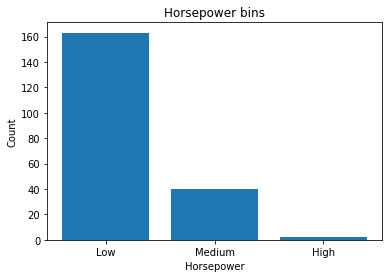

In [29]:
plt.bar(group_names, df["Horsepower binned"].value_counts())
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower bins")

Text(0.5, 1.0, 'Horsepower bins')

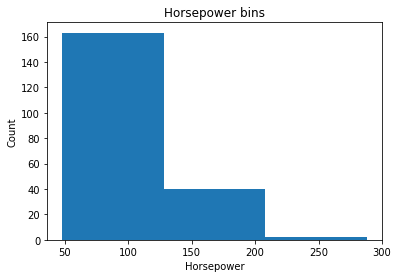

In [30]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["Horsepower"], bins = 3)
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower bins")

### 11. Indicator variable (dummy variable)

This is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. This is done in order to use categorical variables for regression analysis in the later analysis.

For example, "Fuel type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Fuel type" into indicator variables.

In [31]:
dummy_variable_1 = pd.get_dummies(df["Fuel type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [32]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Fuel type", axis = 1, inplace=True)
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,diesel,gas
0,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,13495.0,Low,0,1
1,ALFA-ROMERO,2,convertible,four,0.398773,9.0,111,5000,21,27,16500.0,Low,0,1
2,ALFA-ROMERO,2,hatchback,six,0.466258,9.0,154,5000,19,26,16500.0,Medium,0,1
3,AUDI,4,sedan,four,0.334356,10.0,102,5500,24,30,13950.0,Low,0,1
4,AUDI,4,sedan,five,0.417178,8.0,115,5500,18,22,17450.0,Low,0,1


In [33]:
# The method fillna(arg) replaces the NaN in the DataFrame with arg.
#df.fillna(0)

### 12. Sort data

In [34]:
df.sort_values(by=['Price'], inplace=True)
df.head(10)

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,diesel,gas
138,SUBARU,2,hatchback,four,0.297546,9.00,69,4900,31,36,5118.0,Low,0,1
18,CHEVROLET,2,hatchback,three,0.187117,9.50,48,5100,47,53,5151.0,Low,0,1
50,MAZDA,2,hatchback,four,0.279141,9.00,68,5000,30,31,5195.0,Low,0,1
150,TOYOTA,2,hatchback,four,0.282209,9.00,62,4800,35,39,5348.0,Low,0,1
76,MITSUBISHI,2,hatchback,four,0.282209,9.40,68,5500,37,41,5389.0,Low,0,1
32,HONDA,2,hatchback,four,0.242331,10.10,60,5500,38,42,5399.0,Low,0,1
89,NISSAN,2,sedan,four,0.297546,9.40,69,5200,31,37,5499.0,Low,0,1
118,PLYMOUTH,2,hatchback,four,0.276074,9.40,68,5500,37,41,5572.0,Low,0,1
21,DODGE,2,hatchback,four,0.276074,9.41,68,5500,37,41,5572.0,Low,0,1
51,MAZDA,2,hatchback,four,0.279141,9.00,68,5000,31,38,6095.0,Low,0,1


### 13. Save clean data

In [35]:
# Save data to file
df.to_csv("Data/Cars_CleanData.csv", index=False)

<h3>Read/Save Other Data Formats</h3>



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |

### 14. Preliminary analysis - DataFrame info/summary

In [36]:
# Extract headers titles
df.columns

Index(['Make', 'Doors', 'Body style', 'Num of cylinders', 'Engine size',
       'Compression ratio', 'Horsepower', 'Peak rpm', 'City mpg',
       'Highway mpg', 'Price', 'Horsepower binned', 'diesel', 'gas'],
      dtype='object')

In [37]:
# Get all unique values of a specific column
df['Make'].unique()

array(['SUBARU', 'CHEVROLET', 'MAZDA', 'TOYOTA', 'MITSUBISHI', 'HONDA',
       'NISSAN', 'PLYMOUTH', 'DODGE', 'ISUZU', 'VOLKSWAGEN', 'RENAULT',
       'SAAB', 'PEUGOT', 'VOLVO', 'ALFA-ROMERO', 'AUDI', 'BMW', 'MERCURY',
       'PORSCHE', 'MERCEDES-BENZ', 'JAGUAR'], dtype=object)

In [38]:
# Get all info from row 0
df.loc[0]

Make                 ALFA-ROMERO
Doors                          2
Body style           convertible
Num of cylinders            four
Engine size             0.398773
Compression ratio              9
Horsepower                   111
Peak rpm                    5000
City mpg                      21
Highway mpg                   27
Price                      13495
Horsepower binned            Low
diesel                         0
gas                            1
Name: 0, dtype: object

returns a Series with the data type of each column.

In [39]:
# Statistical summary of the DataFrame excluding NaN (not a number)
df.describe()

,Doors,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,diesel,gas
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,205.000000
mean,3.131707,0.389286,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.129353,0.097561,0.902439
std,0.993715,0.127738,3.972040,39.519219,476.979095,6.542142,6.886443,7947.066342,0.297446,0.297446
min,2.000000,0.187117,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,2.000000,0.297546,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000
50%,4.000000,0.368098,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000,1.000000
75%,4.000000,0.432515,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000
max,4.000000,1.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


In [40]:
# Statistical summary of the DataFrame including all data
df.describe(include = "all")

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,diesel,gas
count,205,205.000000,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205,205.000000,205.000000
unique,22,NaN,5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,TOYOTA,NaN,sedan,four,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,32,NaN,96,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,NaN,NaN
mean,NaN,3.131707,NaN,NaN,0.389286,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.129353,NaN,0.097561,0.902439
std,NaN,0.993715,NaN,NaN,0.127738,3.972040,39.519219,476.979095,6.542142,6.886443,7947.066342,NaN,0.297446,0.297446
min,NaN,2.000000,NaN,NaN,0.187117,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,0.297546,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,NaN,0.000000,1.000000
50%,NaN,4.000000,NaN,NaN,0.368098,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN,0.000000,1.000000
75%,NaN,4.000000,NaN,NaN,0.432515,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,NaN,0.000000,1.000000


In [41]:
# Get a concise summary of your DataFrame
df.info

<bound method DataFrame.info of               Make  Doors Body style Num of cylinders  Engine size  \
138         SUBARU      2  hatchback             four     0.297546   
18       CHEVROLET      2  hatchback            three     0.187117   
50           MAZDA      2  hatchback             four     0.279141   
150         TOYOTA      2  hatchback             four     0.282209   
76      MITSUBISHI      2  hatchback             four     0.282209   
..             ...    ...        ...              ...          ...   
74   MERCEDES-BENZ      2    hardtop            eight     0.932515   
9             AUDI      2  hatchback             five     0.401840   
44           ISUZU      2      sedan             four     0.276074   
45           ISUZU      4      sedan             four     0.276074   
129        PORSCHE      2  hatchback            eight     0.622699   

     Compression ratio  Horsepower  Peak rpm  City mpg  Highway mpg    Price  \
138                9.0          69      4900   

In [42]:
# Group by columns
df_bymake = df.reset_index().groupby(['Make', 'Engine size']).sum()
df_bymake.head()

index  Doors  Compression ratio  Horsepower  \
Make        Engine size                                                
ALFA-ROMERO 0.398773         1      4               18.0         222   
            0.466258         2      2                9.0         154   
AUDI        0.334356         3      4               10.0         102   
            0.401840        17      6               15.3         300   
            0.417178        22     14               33.5         445   

                         Peak rpm  City mpg  Highway mpg    Price  diesel  gas  
Make        Engine size                                                         
ALFA-ROMERO 0.398773        10000        42           54  29995.0       0    2  
            0.466258         5000        19           26  16500.0       0    1  
AUDI        0.334356         5500        24           30  13950.0       0    1  
            0.401840        11000        33           42  23875.0       0    2  
            0.417178        22000        75           97  69330.0       0    4